# Regression Trees

revision: 78571a2

In [60]:
# @formatter:off
# PREAMBLE

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from mlis.arrays import asinput, aslabel

%matplotlib inline
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")
%load_ext autoreload
%autoreload 2
# @formatter:on

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


To make things easier, we will only consider 1-dimensional inputs, that is $x\in\mathbb{R}$.
The decision tree is implemented in the following order:
1. Create a function that identifies the correct partition.
2. Create a function that can make predictions, given a partition and the desired prediction for that partition.
3. Create a function which greedily selects the next split.
4. Create a function that iteratively fits a decision tree.

We will model the partitions as a list of split points `splits`. For example `splits = [20, 60]` defines 3 partitions $(-\infty, 20]$, $(20, 60]$ and $(60, \infty)$.

In [61]:
# Open regression_tree.py and implement the function findSplitIdx

from mlis.trees.regression_tree import findSplitIdx

X = [-np.inf, 20, 20.01, 60, np.inf, 19.999]
splits = [20.0, 60]
np.testing.assert_array_equal(findSplitIdx(X, splits), [0, 0, 1, 1, 2, 0])

Implement a function `predict` which returns `yhat[p]` if the input is in the partition with index `p`.

In [62]:
# Open regression_tree.py and implement the function predict

from mlis.trees.regression_tree import predict

X = [-np.inf, 20, 20.01, 60, np.inf, 19.999]
splits = [20.0, 60]
yhat = [10., 20., 30.]
np.testing.assert_array_almost_equal(predict(X, yhat, splits), [10, 10, 20, 20, 30, 10], decimal=3)

Given training data $X$ and $y$, find $\hat{y}$ for each partition if the squared loss is used.

In [63]:
# Open regression_tree.py and implement the function fit_sq_loss

from mlis.trees.regression_tree import fit_sq_loss

X = [-np.inf, 20, 20.01, 60, np.inf, 19.999]
y = [11, 12, 21, 22, 30, 13]
splits = [20.0, 60]
np.testing.assert_array_almost_equal(fit_sq_loss(X, y, splits), [12., 21.5, 30.], decimal=3)

Implement the objective function $J$ which tells us how good the split is using the square loss.

In [64]:
# Open regression_tree.py and implement the function J

from mlis.trees.regression_tree import J

X = [-np.inf, 20, 20.01, 60, np.inf, 19.999]
y = [11, 12, 21, 22, 30, 13]
splits = [20.0, 60]
np.testing.assert_array_almost_equal(J(X, y, splits), 0.417, decimal=3)

The only thing left is to find the `splits`.
Given the current partition defined by `splits` find the next best split point.
We define the best split to be in de *middle*
If no split reduces the objective $J$, return `None`

C:\Users\Leo\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Leo\AppData\Roaming\Python\Python39\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


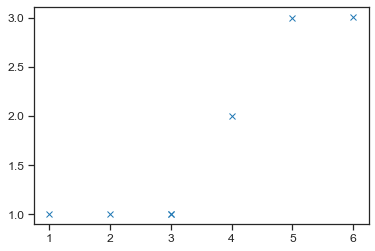

In [65]:
# Open regression_tree.py and implement the function find_next_split

from mlis.trees.regression_tree import find_next_split

X = [6, 1, 3, 3, 2, 4, 5]
y = [3.01, 1, 1, 1, 1, 2, 3]

fig, ax = plt.subplots()
ax.plot(X, y, 'x')

np.testing.assert_array_almost_equal(find_next_split(X, y, []), 3.5, decimal=3)
np.testing.assert_array_almost_equal(find_next_split(X, y, [3]), 4.5, decimal=3)
np.testing.assert_array_almost_equal(find_next_split(X, y, [1.5, 2.5, 3.5, 4.5]), 5.5, decimal=3)
assert find_next_split(X, y, [1.5, 2.5, 3.5, 4.5, 5.5]) is None

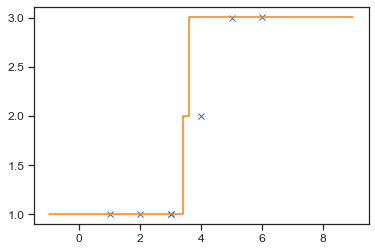

In [66]:
# Open regression_tree.py and implement the function fit_tree

from mlis.trees.regression_tree import fit_tree

X = [6, 1, 3, 3, 2, 4, 5]
y = [3.01, 1, 1, 1, 1, 2, 3]
t = [-1, 3.4, 3.6, 9]

h = fit_tree(X, y, max_splits=1)
np.testing.assert_array_almost_equal(h(t), [1., 1., 2.67, 2.67], decimal=3)
h = fit_tree(X, y, max_splits=10)
np.testing.assert_array_almost_equal(h(t), [1., 1., 2., 3.01], decimal=3)

fig, ax = plt.subplots()
ax.plot(X, y, 'x')
ax.plot(t, h(t), drawstyle='steps-pre');

Test on real data. Reproduce figure 8.5 on page 73.

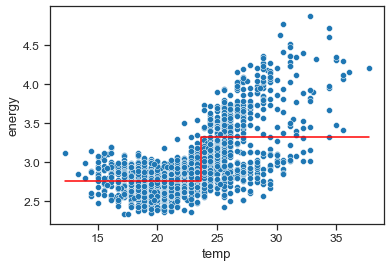

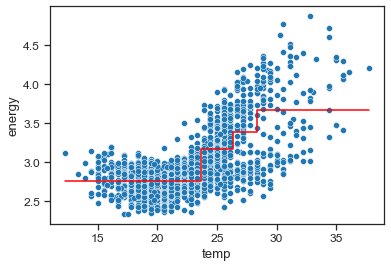

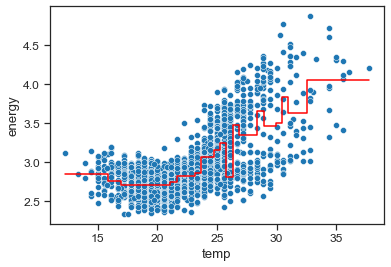

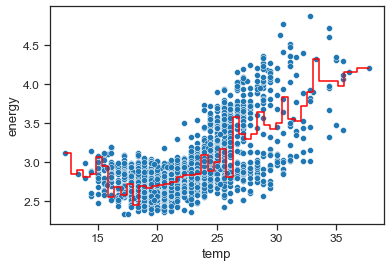

In [67]:
# test on real data
# load the data
df = pd.read_csv('energy.csv', sep=' ')
X = asinput(df['temp'])
y = aslabel(df['energy'])
t = np.linspace(X.min(), X.max())

for max_splits in [1, 3, 20, 100]:
    h = fit_tree(X, y, max_splits)
    fig, ax = plt.subplots()
    sns.scatterplot(ax=ax, x='temp', y='energy', data=df)
    ax.plot(t, h(t), 'r', drawstyle='steps-pre')